In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
# License: MIT

In [3]:
%matplotlib inline

## Packages

In [4]:
import numpy as np
import scipy as scipy
import scipy.stats as stats
import scipy.linalg as linalg
from pprint import pprint

import matplotlib.gridspec as gridspec
import matplotlib.path as mpath
import matplotlib.pyplot as plt

import sys
import os
import copy
import string
import glob
import xarray as xr 

import warnings

## Modules

In [5]:
from example_funcs import LogisticMap

# The Logistic Map

Recall the Logistic map was defined as 
$$ x_{n+t} = r x_n(1-x_n) $$

# Iterate for $r = 3.57$

In [19]:
# define parameters
#r = 3.57
r = 3.82943
x0 = np.array([0.1])
Nsteps = 1000

In [20]:
# create empty solution vector 
xtraj = np.empty((Nsteps+1,1));
xtraj[:] = np.nan

# input initial condition
xtraj[0,:] = x0;

In [21]:
for i in np.arange(0,Nsteps):
    x0 = LogisticMap(x0,r);
    xtraj[i+1,:] = x0;

## Plot solutions

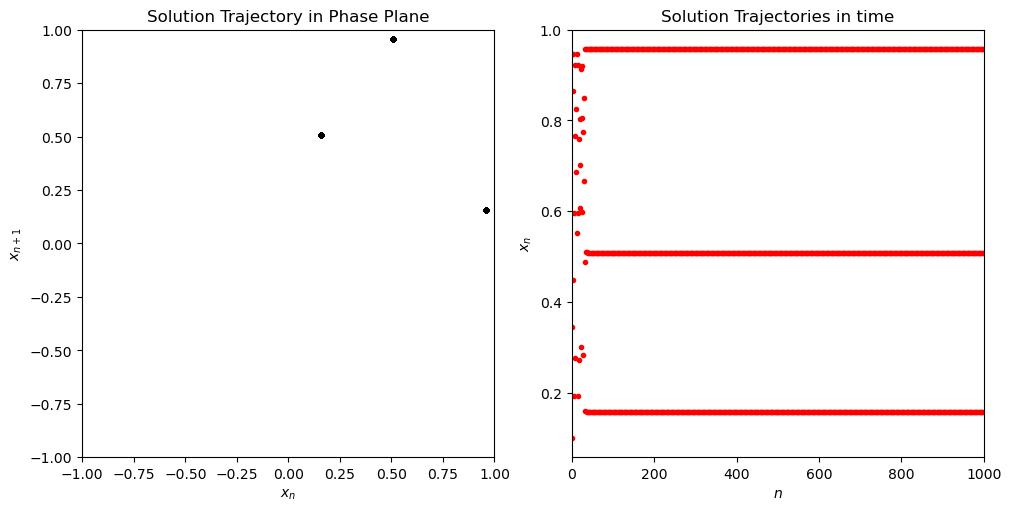

In [22]:
fig, axs = plt.subplots(1, 2, layout='constrained', figsize=(10, 5))

ax1 = axs[0]
ax1.plot(xtraj[100:-1,:],xtraj[101:,:],'.',c='k')
ax1.set_xlabel("$x_n$")
ax1.set_ylabel("$x_{n+1}$")
ax1.set_title("Solution Trajectory in Phase Plane")
#ax1.set_xlim([-np.abs(r)-1, np.abs(r)+1])
#ax1.set_ylim([-np.abs(r)-1, np.abs(r)+1])
ax1.set_xlim([-1, 1])
ax1.set_ylim([-1, 1])

ax2 = axs[1] 
ax2.plot(np.arange(0,Nsteps+1),xtraj,'r.')
ax2.set_xlabel("$n$")
ax2.set_ylabel("$x_{n}$")
ax2.set_title("Solution Trajectories in time")
ax2.set_xlim([0, Nsteps])

plt.show()

# Calculate Lyapunov exponents

The tangent function of the logistic map can be directly calculated as
$$ \partial f(x_n) = r(1-2x_n) $$

In [12]:
tan_func = lambda x: r*(1-2*x)
logdf = lambda x: np.log(np.abs(tan_func(x)))

Lyap = np.mean(logdf(xtraj))

print("The Lyapunov exponent for r = " + str(r) + " is " + str(Lyap))

The Lyapunov exponent for r = 3.57 is 0.015065588708612644


## Plot Lyapunov exponent for varying $r$

In [13]:
r_vals = np.linspace(1,4,300)

Lyaps = np.empty((len(r_vals),1))
Lyaps[:]= np.nan

for j in np.arange(0,len(r_vals)):
    r = r_vals[j]
    x0 = np.array([0.1])
    
    # create empty solution vector 
    xtraj = np.empty((Nsteps+1,1))
    xtraj[:] = np.nan
    
    # input initial condition
    xtraj[0,:] = x0
    
    # iterate map
    for i in np.arange(0,Nsteps):
        x0 = LogisticMap(x0,r)
        xtraj[i+1,:] = x0
    
    tan_func = lambda x: r*(1-2*x)
    logdf = lambda x: np.log(np.abs(tan_func(x)))

    Lyap = np.mean(logdf(xtraj))

    Lyaps[j] = Lyap

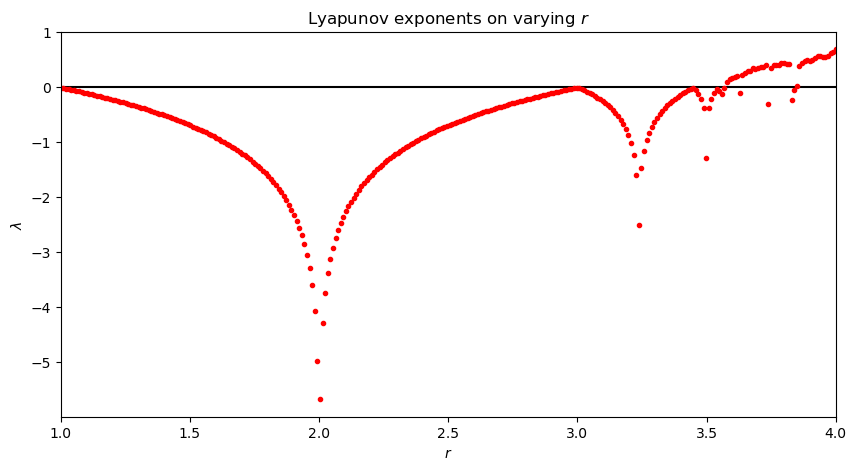

In [14]:
fig = plt.figure(figsize=(10,5))
plt.plot([r_vals[0],r_vals[-1]],[0,0],c='k')
plt.plot(r_vals,Lyaps,'.',c='r')
plt.xlabel("$r$")
plt.ylabel("$\lambda$")
plt.title("Lyapunov exponents on varying $r$")
plt.xlim([r_vals[0], r_vals[-1]])
plt.show()